# 1. Import lib and Data

In [1]:
import os
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

os.listdir()

['.config', 'drive', 'sample_data']

Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными. 
DataFrame должен состоять из 10000 строк и 5 колонок.

Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:
- 1-я колонка – user_id – идентификатор пользователя. Длина user_id должна равняться 15-ти символам. Идентификатор состоит из случайной комбинации следующих символов: "1234567890abcdefghijk". Для каждой строки в DataFrame значение user_id формируются случайным образом.

- 2-я колонка – order_number – номер заказа. Столбец необходимо заполнить случайными значениями в диапазоне от 1 до 10.

- 3-я колонка – click2delivery – время, прошедшее с момента оформления заказа до вручения клиенту. Столбец необходимо заполнить случайными значениями из нормального распределения со средним 1440 и стандартным отклонением 200.

- 4-я колонка – order_items_sum – общая стоимость заказа. Значения для этого столбца необходимо взять из экспоненциального распределения с параметром λ = 1, смещённого на +1. 

- 5-я колонка – retention – день жизни покупателя, в который он совершил заказ. Необходимо сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15 и 0.05 соответственно.

В случае, если в колонке user_id встречаются дублирующиеся значения, оставь только первое из них.

In [2]:
letters = '1234567890abcdefghijk'
def generate1(N):
    rand_string = []
    while len(rand_string)!=10000:
        i = ''.join(random.choice(letters) for i in range(15))
        if i not in rand_string:
          rand_string.append(i)
    return rand_string

def generate2(N):
    return [ random.randint(0,10) for i in range(N) ]

def generate3(N):
    return [ random.normalvariate(mu=1440, sigma=200) for i in range(N) ]

def generate4(N):
    return [ random.expovariate(lambd=1)+1 for i in range(N) ]

values=[1, 2, 3, 4, 5]
weights = [0.35, 0.25, 0.2, 0.15, 0.05]
def generate5(N):
    return random.choices(values, weights, k=N)

In [3]:
N=10000

df1 = pd.DataFrame([])

df1['user_id'] = generate1(N)
df1['order_number'] = generate2(N)
df1['click2delivery'] = generate3(N)
df1['order_items_sum'] = generate4(N)
df1['retention'] = generate5(N)

df1

,user_id,order_number,click2delivery,order_items_sum,retention
0,eea8b6f76efk39e,6,1368.409892,1.662350,1
1,826925d417g9829,10,1785.877097,1.486873,1
2,bdg049kahe45b00,1,1553.639416,1.625219,3
3,f8j8b8k3bkigc0k,9,1723.568669,1.235322,2
4,2d3f8c41f096jbg,2,1553.091391,1.312626,2
...,...,...,...,...,...
9995,hcdbabf458jcf47,8,1702.163254,2.469058,2
9996,9fi9dih3e82j27e,1,1550.647106,1.483085,1
9997,0178daa8ah21baa,2,1502.860505,3.757025,2
9998,2g3ia3g5e69aa84,10,1394.163767,1.210517,5


# Задача 1.
- Для всех строк исходного датасета, сгруппированных по номеру заказа, посчитать среднее значение времени доставки по группе. Результат необходимо добавить в новый столбец датафрейма.

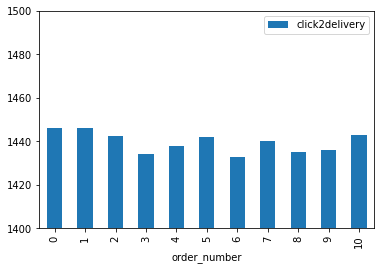

,click2delivery
order_number,
0,1445.995775
1,1446.155060
2,1442.353153
3,1434.360957
4,1437.761321
5,1442.168283
6,1432.876459
7,1440.133268
8,1435.137443


In [4]:
df_result = df1.groupby(['order_number'])[['click2delivery']].mean()

df_result.plot.bar()
plt.ylim([1400, 1500])
plt.show()

df_result

# Задача 2.
- 2. Отдельной колонкой добавить значения последовательности, начинающейся с 0,1, где каждый следующий элемент является суммой двух предыдущих, умноженных на 0.5

In [5]:
N = df_result.shape[0]

def task2(N):
  
  list_return = []

  for i in range(N):
    if i==0:
      new_value = 0.1
    elif i==1:
      new_value = 0.5 * ((0.1)+(0))
    else:
      new_value = 0.5 * ((list_return[i-2])+(list_return[i-1]))
    list_return.append(new_value)
  
  return list_return

df_result['task2'] = task2(N)
df_result

,click2delivery,task2
order_number,,
0,1445.995775,0.100000
1,1446.155060,0.050000
2,1442.353153,0.075000
3,1434.360957,0.062500
4,1437.761321,0.068750
5,1442.168283,0.065625
6,1432.876459,0.067188
7,1440.133268,0.066406
8,1435.137443,0.066797


# Задача 3.
- Напиши функцию, которая принимает на вход значение user_id и возвращает строку следующего вида: все буквы в той последовательности, в которой они встречаются в user_id, затем квадрат числа, полученного из всех цифр в user_id в той последовательности, в которой они встречаются в user_id.

In [6]:
import re

def task3(user_id):
  val_str = ''.join(
                     re.findall( '[A-Za-z]+',user_id ) 
                  )
  val_int = str(
          (
            int(
                 '0' + ''.join(
                                re.findall( '[0-9]',user_id ) 
                              ) 
              )
          )^2 
       )
  
  return val_str+val_int

df1['user_id'].map(lambda x: task3(x) )

0       eeabfefke867637
1       dg8269254179831
2        bdgkaheb494502
3       fjbkbkigck88828
4       dfcfjbg23841098
             ...       
9995    hcdbabfjcf45845
9996    fidiheje9938225
9997     daaahbaa178823
9998    giageaa23356986
9999    cdbjfdbd1516894
Name: user_id, Length: 10000, dtype: object

# Задача 4.
- Добавь результат применения этой функции к user_id в новый столбец. Использование циклов вне функции запрещено.

In [7]:
df1['task4'] = df1['user_id'].map(lambda x: task3(x) )
df1

,user_id,order_number,click2delivery,order_items_sum,retention,task4
0,eea8b6f76efk39e,6,1368.409892,1.662350,1,eeabfefke867637
1,826925d417g9829,10,1785.877097,1.486873,1,dg8269254179831
2,bdg049kahe45b00,1,1553.639416,1.625219,3,bdgkaheb494502
3,f8j8b8k3bkigc0k,9,1723.568669,1.235322,2,fjbkbkigck88828
4,2d3f8c41f096jbg,2,1553.091391,1.312626,2,dfcfjbg23841098
...,...,...,...,...,...,...
9995,hcdbabf458jcf47,8,1702.163254,2.469058,2,hcdbabfjcf45845
9996,9fi9dih3e82j27e,1,1550.647106,1.483085,1,fidiheje9938225
9997,0178daa8ah21baa,2,1502.860505,3.757025,2,daaahbaa178823
9998,2g3ia3g5e69aa84,10,1394.163767,1.210517,5,giageaa23356986


# Задача 5.
- Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для столбцов click2delivery, order_items_sum и retention. Построй гистограммы распределения значений в столбцах

In [8]:
df_res = pd.DataFrame([])

for col in ['click2delivery', 'order_items_sum', 'retention']:
  res = {}
  for j in ['mode', 'median', 'mean', 'var', 'std']:
    # Мод может быть несколько, берем единственное
    if j=='mode':
      res[j] = df1[col].mode()[0]
    else:
      res[j] = df1[col].agg(j)
  df_res = df_res.append( pd.DataFrame.from_dict(res,orient='index').T )

df_res = pd.DataFrame( ['click2delivery', 'order_items_sum', 'retention'] ).join( df_res.reset_index(drop=True) )
df_res.columns = [str(x).replace('0','columns') for x in df_res.columns]
df_res

,columns,mode,median,mean,var,std
0,click2delivery,726.813145,1437.863524,1439.585292,40276.859840,200.690956
1,order_items_sum,1.000054,1.683683,1.985250,0.997641,0.998820
2,retention,1.000000,2.000000,2.316900,1.514626,1.230701


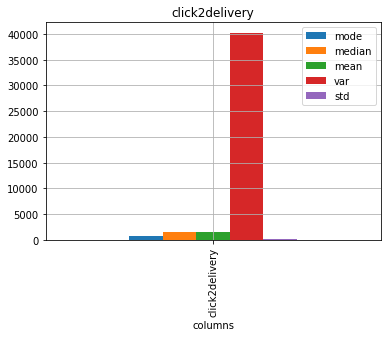

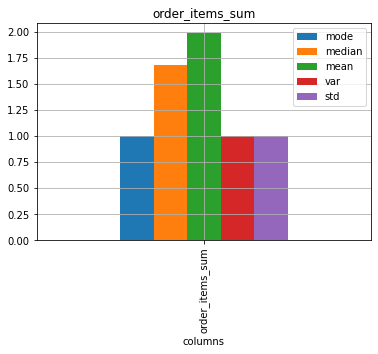

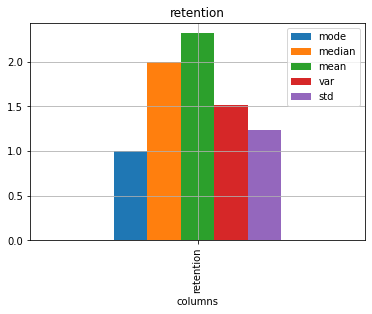

In [9]:
for col in ['click2delivery', 'order_items_sum', 'retention']:
  df_plot = df_res[df_res['columns']==col].set_index('columns')
  df_plot.plot.bar()
  plt.title(col)
  plt.grid()
  plt.show()

# Задача 6.
- Построй график, который наиболее полно, на твой взгляд, описывает зависимость времени доставки заказа от его номера. Обоснуй, почему ты так считаешь?

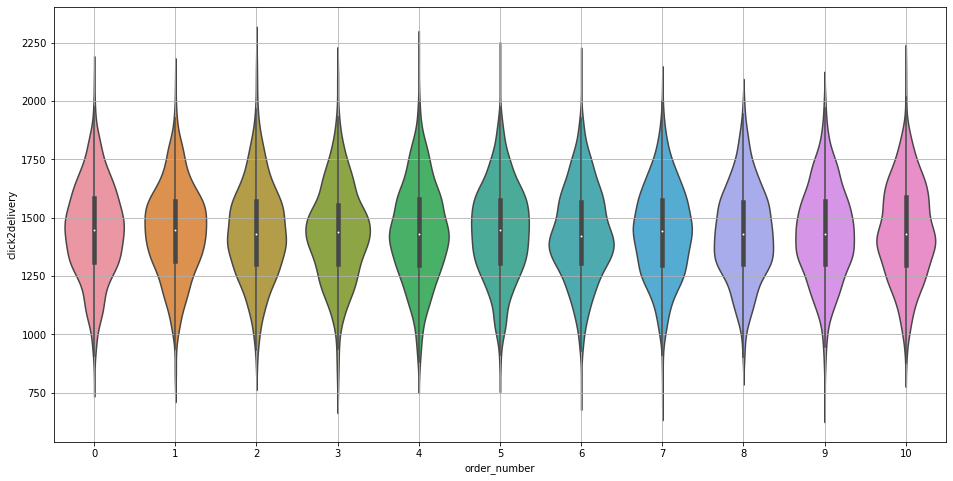

In [10]:
# Нам нужно увидеть распределение количества заказов во времени и по номеру, поэтому такое:
plt.figure( figsize = (16,8) )
sns.violinplot( data=df1
               , x="order_number"
               , y="click2delivery"
               )
plt.grid()
plt.show()